In [1]:
import os
import pickle
import itertools
import pandas as pd

from matplotlib import colors
import matplotlib.pyplot as plt

from map_engine.map_generator import map

from quest_engine.quest_generator import *
from quest_engine.freytags_fitness import freytags

from encounter_engine.world_encounters import *

from character_engine.character import *

In [2]:
#nw = map()
#
#nw.populate_map(n_locations=1024, name="terrain", relaxed=True, k=100)
#nw.populate_map(n_locations=4096, name="civilisation", relaxed=True, k=250)
#nw.populate_map(n_locations=36, name="story_act", relaxed=True, k=250)
#nw.populate_map(n_locations=1024, name="threat", relaxed=True, k=100)
#
#nw.attribute_view(seed_1=24, seed_2=34,
#                  map_name="terrain", view_name="terrain")
#nw.attribute_view(seed_1=98, seed_2=50, map_name="civilisation",
#                  view_name="civilisation", double=False)
#nw.attribute_view(seed_1=34, seed_2=34, map_name="threat",
#                  view_name="threat", double=False)
#nw.attribute_view(seed_1=16, seed_2=16, map_name="story_act",
#                  view_name="story_act", double=False)
#
#nw.attribute_centroids("civilisation")
#nw.attribute_centroids("terrain")
##nw.land_mask()
#
#with open('logs/map_nw', 'wb') as f:
#    pickle.dump(nw, f)

with open("logs/map_nw", "rb") as f:
    nw = pickle.load(f)

In [ ]:

muts = ["complete","single_point","random_point"]
xos = ["pmx","single_point","ar"]
mups =  [.2,.4,.6,.8]

for param in [p for p in itertools.product(*[muts,xos,mups])]:

            params = {
                "map"           :   nw,
                "mutation"      :   param[0],
                "xo"            :   param[1],
                "mu_p"          :   param[2],
                "gens"          :   500,
                "shelf_size"    :   200,
                "pop_size"      :   100,
                "print_it"      :   False,
                "brute_force"   :   False,
                "log"           :   True,
                "early_stop"    :   True,
            }

            ql = quest_library(params)

In [ ]:
params = {
                "map"           :   nw,
                "mutation"      :   "random_point",
                "xo"            :   "pmx",
                "mu_p"          :   .4,
                "gens"          :   200,
                "shelf_size"    :   1,
                "pop_size"      :   100,
                "print_it"      :   False,
                "brute_force"   :   False,
                "log"           :   True,
                "early_stop"    :   False,
            }

a = quest_library(params)

In [3]:
pop = quest_pop(nw,act=2, pop_size=200, steps=4)
ind = pop.evolve(gens=1,early_stop=False, mu_p=.4, xo="pmx", mutation="random_point")

Found the required individual on gen 19


In [18]:
pop = pack_population(nw,pop_size=10,pack_size=10,type="cannibals",world_atlas=[],yellow_pages=[])

pop.evolve(mu_p=0.22,mutation="complete",crossover="ax_pmx")

Gen 1, found individuals: 2
Gen 2, found individuals: 5
Found required individuals: 5, on generation 2


In [21]:
pop_1 = pack_population(nw,pop_size=10,pack_size=10,type="snake",world_atlas=[],yellow_pages=[])

pop_1.evolve(mu_p=0.22,mutation="complete",crossover="ax_pmx")

Gen 1, found individuals: 2
Gen 2, found individuals: 4
Gen 3, found individuals: 7
Gen 4, found individuals: 7
Gen 5, found individuals: 10
Gen 6, found individuals: 10
Gen 7, found individuals: 11
Gen 8, found individuals: 14
Gen 9, found individuals: 15
Gen 10, found individuals: 17
Gen 11, found individuals: 17
Gen 12, found individuals: 18
Gen 13, found individuals: 18
Gen 14, found individuals: 20
Found required individuals: 20, on generation 14


In [5]:
ind.place_quest_npc()
ind.summary()



Quest challange type:  int
Quest difficulty:  5.0
Quest act:  2
Quest steps:  4
Quest total distance:  549.0220865318593
Quest fitness:  -144.16192285066123
Quest fitnesses:  4
Quest freytags fitness:  [0, 0, 0, 0]
Quest path:  [[896.1, 633.5], [660.8, 688.1], [514.7, 464.5], [535.5, 429.9]]
Quest path threat:  [0, 2, 8, 5]
Quest path act:  [2, 0, 2, 2]
Quest path act fitness:  3
Quest path npc:  [1, 0, 1, 0]
Quest path npc book:  [<character_engine.character.npc object at 0x7fbc05da9ca0>, None, <character_engine.character.npc object at 0x7fbbffe06bb0>, None]
Quest path distances:  [241.55175428880668, 267.09955072968575, 40.370781513366815]


In [ ]:
a.library[0].summary()

In [ ]:

path = "logs/"
files = os.listdir(path)
files = [f for f in files if f.endswith(".csv")]

df = pd.concat([pd.read_csv(path+f) for f in files])


for f in files:
    os.remove(path+f)
    
df.to_csv("logs/merged.csv", index=False)




/var/folders/b0/myrlwrn92tx10wp6gb5y7c540000gn/T/ipykernel_12246/3889279086.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


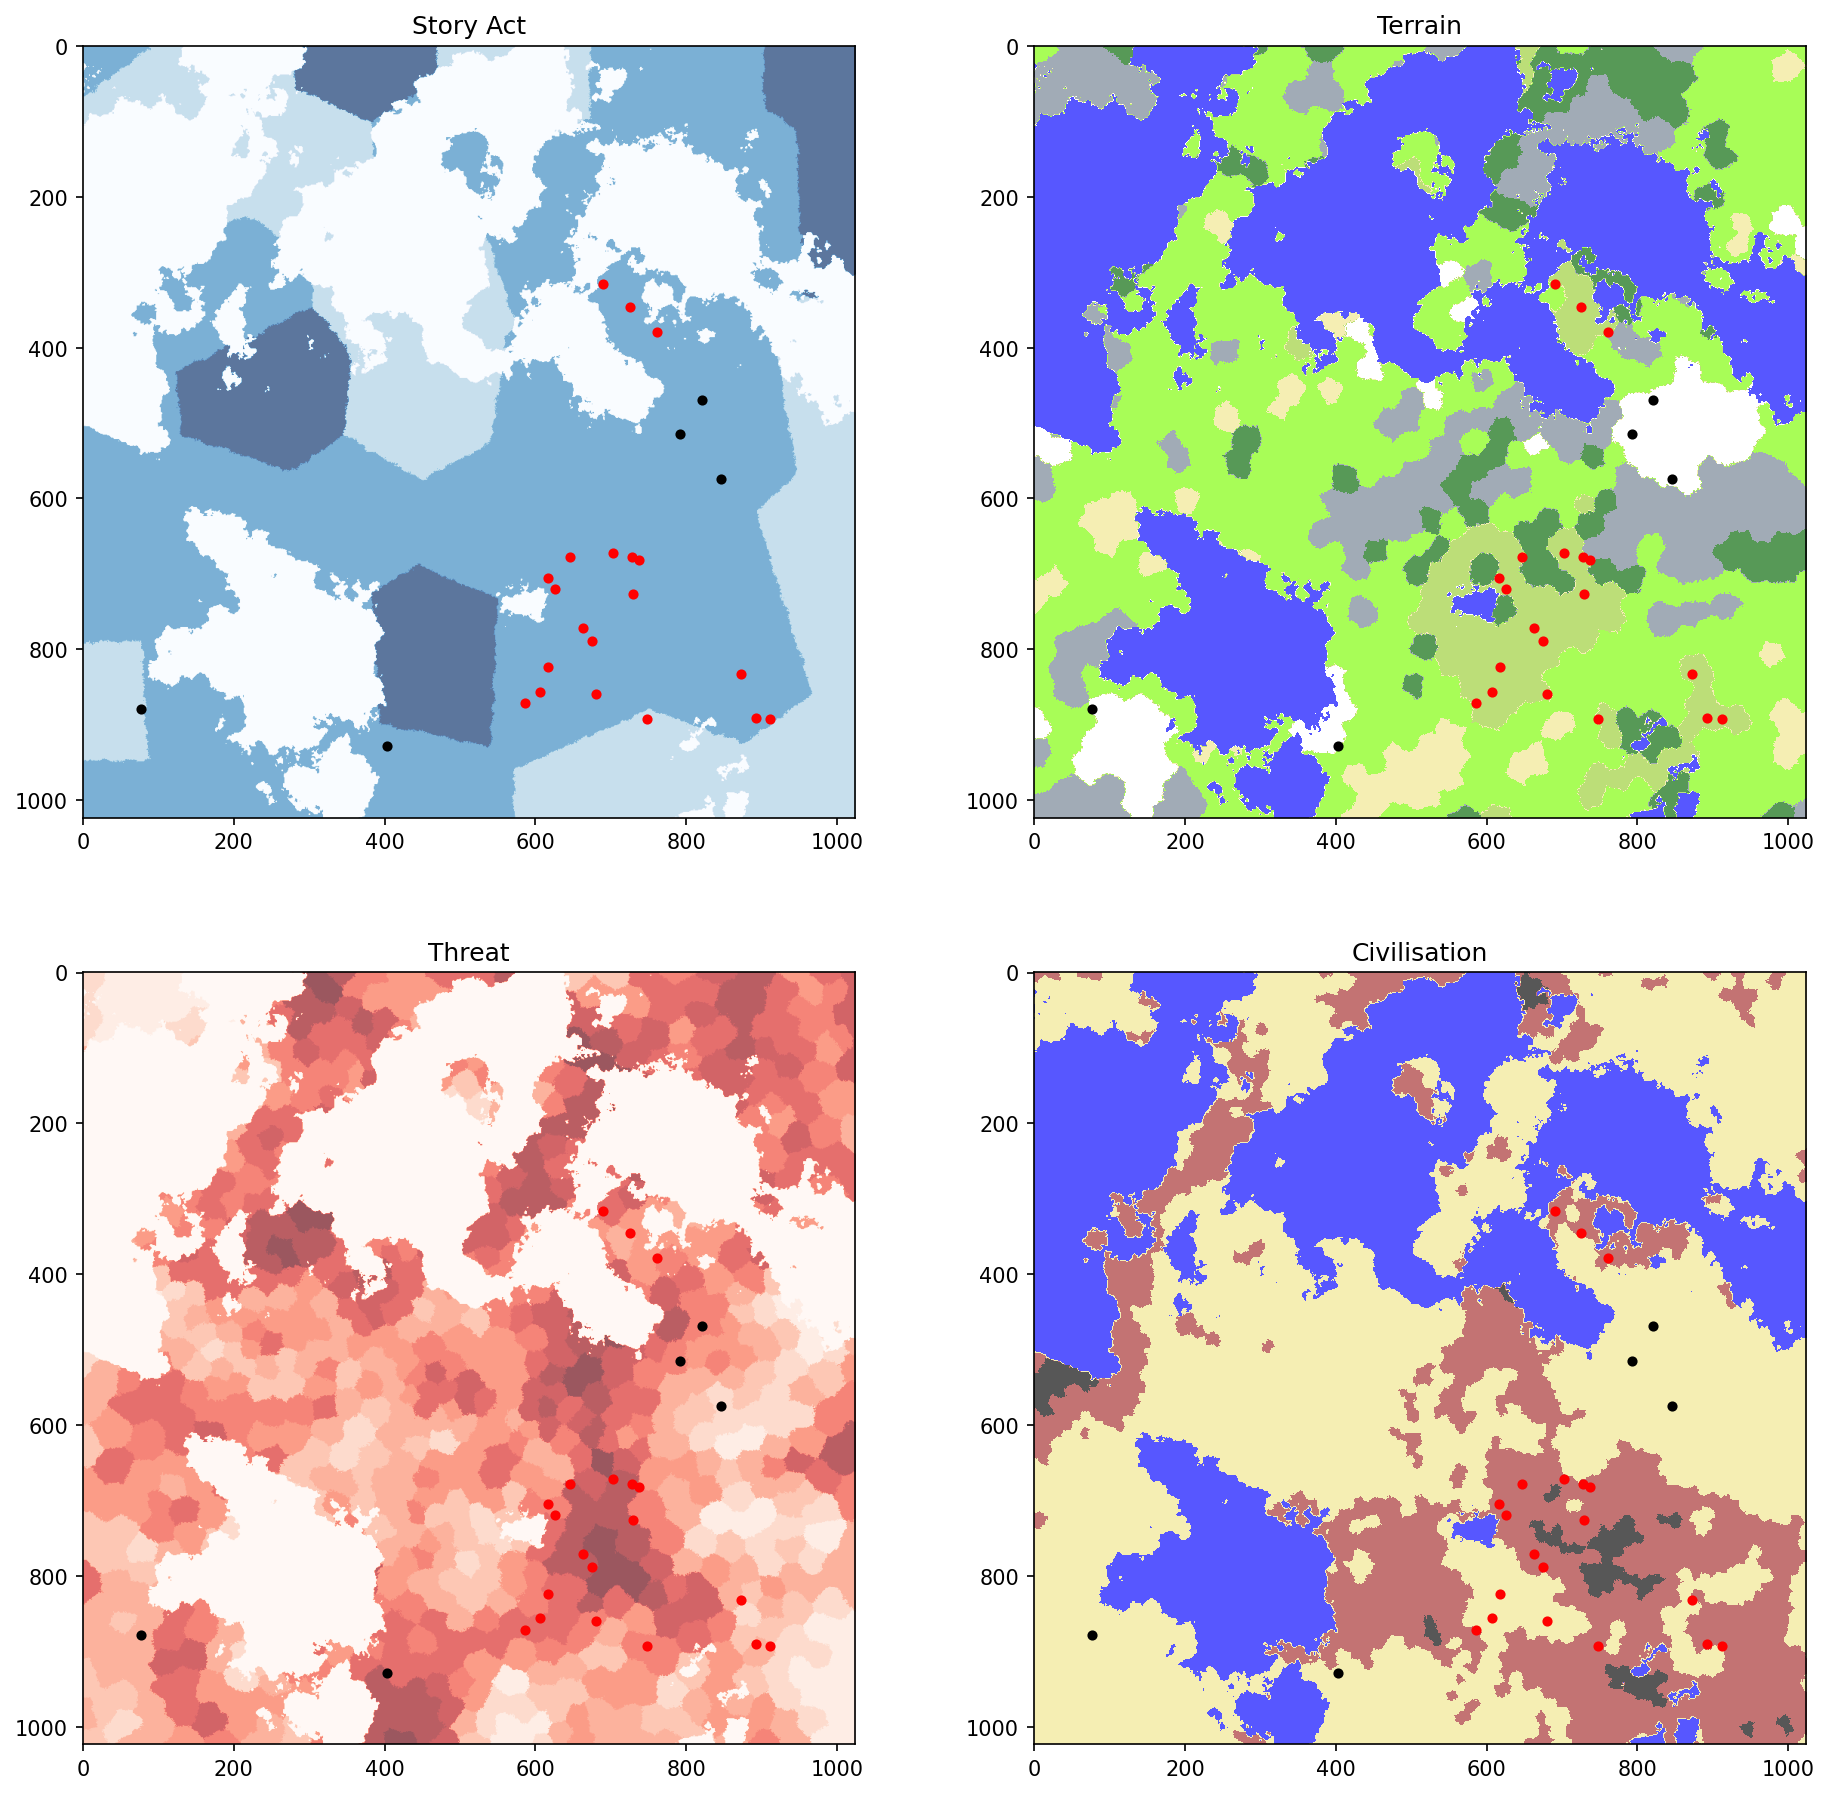

In [22]:
#nw.land_mask()

x = [i[0] for i in pop.world_atlas]
y = [i[1] for i in pop.world_atlas]

x_1 = [i[0] for i in pop_1.world_atlas]
y_1 = [i[1] for i in pop_1.world_atlas]

cmap = colors.ListedColormap(
    ["blue","white", "yellowgreen", "khaki", "lawngreen", "slategrey", "darkgreen"])
cmap_arcs = colors.ListedColormap(
    ["blue", "khaki", "khaki", "khaki", "khaki", "khaki", "khaki", "brown", "brown", "brown", "black", ])

q_colors = ["red","goldenrod","purple","darkgreen","black"]

ter = nw.views["terrain"].copy()
civ = nw.views["civilisation"].copy()
thr = nw.views["threat"].copy()
arc = nw.views["story_act"].copy()

fig, ax = plt.subplots(2, 2)
fig.set_dpi(150)
fig.set_size_inches(15, 15)

ax[0, 1].imshow(ter.T, cmap=cmap, alpha=.66)
ax[0, 1].set_title("Terrain")
ax[0, 1].scatter(x, y, c="black", s=15)
ax[0, 1].scatter(x_1, y_1, c="red", s=15)
  

ax[1, 1].imshow(civ.T, cmap=cmap_arcs, alpha=0.66)
ax[1, 1].set_title("Civilisation")
ax[1, 1].scatter(x, y, c="black", s=15)
ax[1, 1].scatter(x_1, y_1, c="red", s=15)


ax[1, 0].imshow(thr.T, cmap="Reds", alpha=0.66)
ax[1, 0].set_title("Threat")
ax[1, 0].scatter(x, y, c="black", s=15)
ax[1, 0].scatter(x_1, y_1, c="red", s=15)


ax[0, 0].imshow(arc.T, cmap="Blues", alpha=0.66)
ax[0, 0].set_title("Story Act")
ax[0, 0].scatter(x, y, c="black", s=15)
ax[0, 0].scatter(x_1, y_1, c="red", s=15)



fig.show()
